# Librerías

In [46]:
!pip install category_encoders

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from seaborn import lmplot
from seaborn import boxplot
from seaborn import violinplot
from seaborn import kdeplot

In [2]:
df = pd.read_csv ("ET-Short.csv", delimiter=';')
df.head()

<ipython-input-2-c5d685e221b0>:1: DtypeWarning: Columns (1,2,6,7,8,9,10,11,19) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv ("ET-Short.csv", delimiter=';')


,Unnamed: 0,Map,Team,InternalTeamId,MatchId,RoundId,RoundWinner,MatchWinner,Survived,AbnormalMatch,...,RoundKills,RoundAssists,RoundHeadshots,RoundFlankKills,RoundStartingEquipmentValue,TeamStartingEquipmentValue,MatchKills,MatchFlankKills,MatchAssists,MatchHeadshots
0,600.0,de_inferno,Terrorist,1.0,4.0,1.0,False,True,False,False,...,0.0,0.0,0.0,0.0,750.0,4400.0,0.0,0.0,0.0,0.0
1,601.0,de_inferno,Terrorist,1.0,4.0,1.0,False,True,False,False,...,0.0,0.0,0.0,0.0,800.0,4400.0,0.0,0.0,0.0,0.0
2,602.0,de_inferno,Terrorist,1.0,4.0,1.0,False,True,False,False,...,0.0,0.0,0.0,0.0,1000.0,4400.0,0.0,0.0,0.0,0.0
3,603.0,de_inferno,Terrorist,1.0,4.0,1.0,False,True,False,False,...,0.0,0.0,0.0,0.0,850.0,4400.0,0.0,0.0,0.0,0.0
4,604.0,de_inferno,Terrorist,1.0,4.0,1.0,False,True,True,False,...,0.0,0.0,0.0,0.0,1000.0,4400.0,0.0,0.0,0.0,0.0


# Análisis Exploratorio

Examinaremos la relación entre el número de "headshots" en una ronda de Counter-Strike (representado por la variable "RoundHeadshots") y el número total de muertes en esa misma ronda ("RoundKills"), teniendo en cuenta también la cantidad de muertes en el partido en general ("MatchKills"). En resumen, este análisis podría ayudarnos a identificar si el número de headshots en una ronda de Counter-Strike está relacionado de alguna manera con el número total de muertes en esa ronda, y si esta relación se ve influenciada por la cantidad total de muertes en el partido en general.

In [32]:
df.columns[df.isnull().any()]

Index(['Unnamed: 0', 'Map', 'Team', 'InternalTeamId', 'MatchId', 'RoundId',
       'RoundWinner', 'MatchWinner', 'Survived', 'AbnormalMatch', 'TimeAlive',
       'TravelledDistance', 'RLethalGrenadesThrown',
       'RNonLethalGrenadesThrown', 'PrimaryAssaultRifle', 'PrimarySniperRifle',
       'PrimaryHeavy', 'PrimarySMG', 'PrimaryPistol', 'FirstKillTime',
       'RoundKills', 'RoundAssists', 'RoundHeadshots', 'RoundFlankKills',
       'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue',
       'MatchKills', 'MatchFlankKills', 'MatchAssists', 'MatchHeadshots'],
      dtype='object')

In [34]:
miss = df.isnull().sum()/len(df)
miss = miss[miss > 0]
miss.sort_values(inplace=True)
miss

Unnamed: 0                     0.974746
MatchFlankKills                0.974746
MatchKills                     0.974746
TeamStartingEquipmentValue     0.974746
RoundStartingEquipmentValue    0.974746
RoundFlankKills                0.974746
RoundHeadshots                 0.974746
RoundAssists                   0.974746
RoundKills                     0.974746
FirstKillTime                  0.974746
PrimaryPistol                  0.974746
PrimarySMG                     0.974746
PrimaryHeavy                   0.974746
PrimarySniperRifle             0.974746
PrimaryAssaultRifle            0.974746
RNonLethalGrenadesThrown       0.974746
RLethalGrenadesThrown          0.974746
TravelledDistance              0.974746
TimeAlive                      0.974746
AbnormalMatch                  0.974746
Survived                       0.974746
RoundWinner                    0.974746
RoundId                        0.974746
MatchId                        0.974746
InternalTeamId                 0.974746


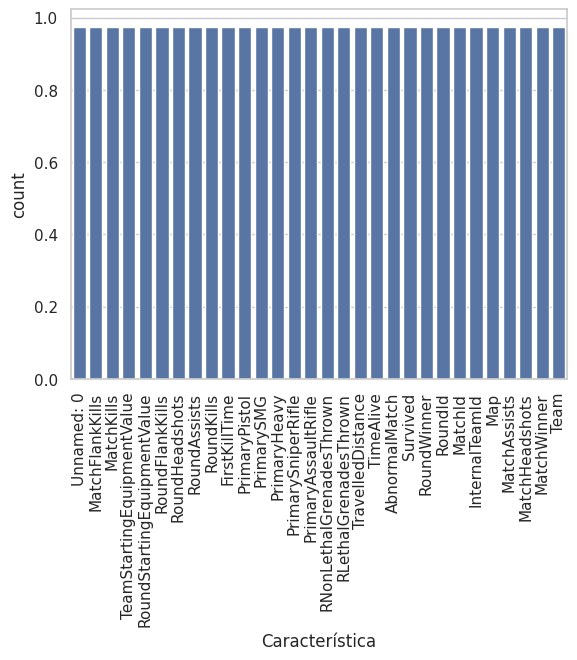

In [35]:
miss = miss.to_frame()
miss.columns = ['count']
miss.index.names = ['Nombre']
miss['Característica'] = miss.index
#
sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'Característica', y = 'count', data=miss)
plt.xticks(rotation = 90)
plt.show()

<ipython-input-63-10585e831b02>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dfa)


<Axes: xlabel='RoundKills', ylabel='Density'>

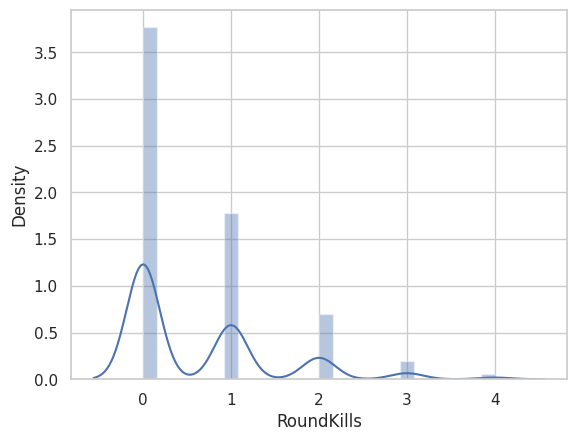

In [63]:
# Revisamos la distribución de la variable objetivo.

dfa = df['RoundKills'].dropna()
sns.distplot(dfa)

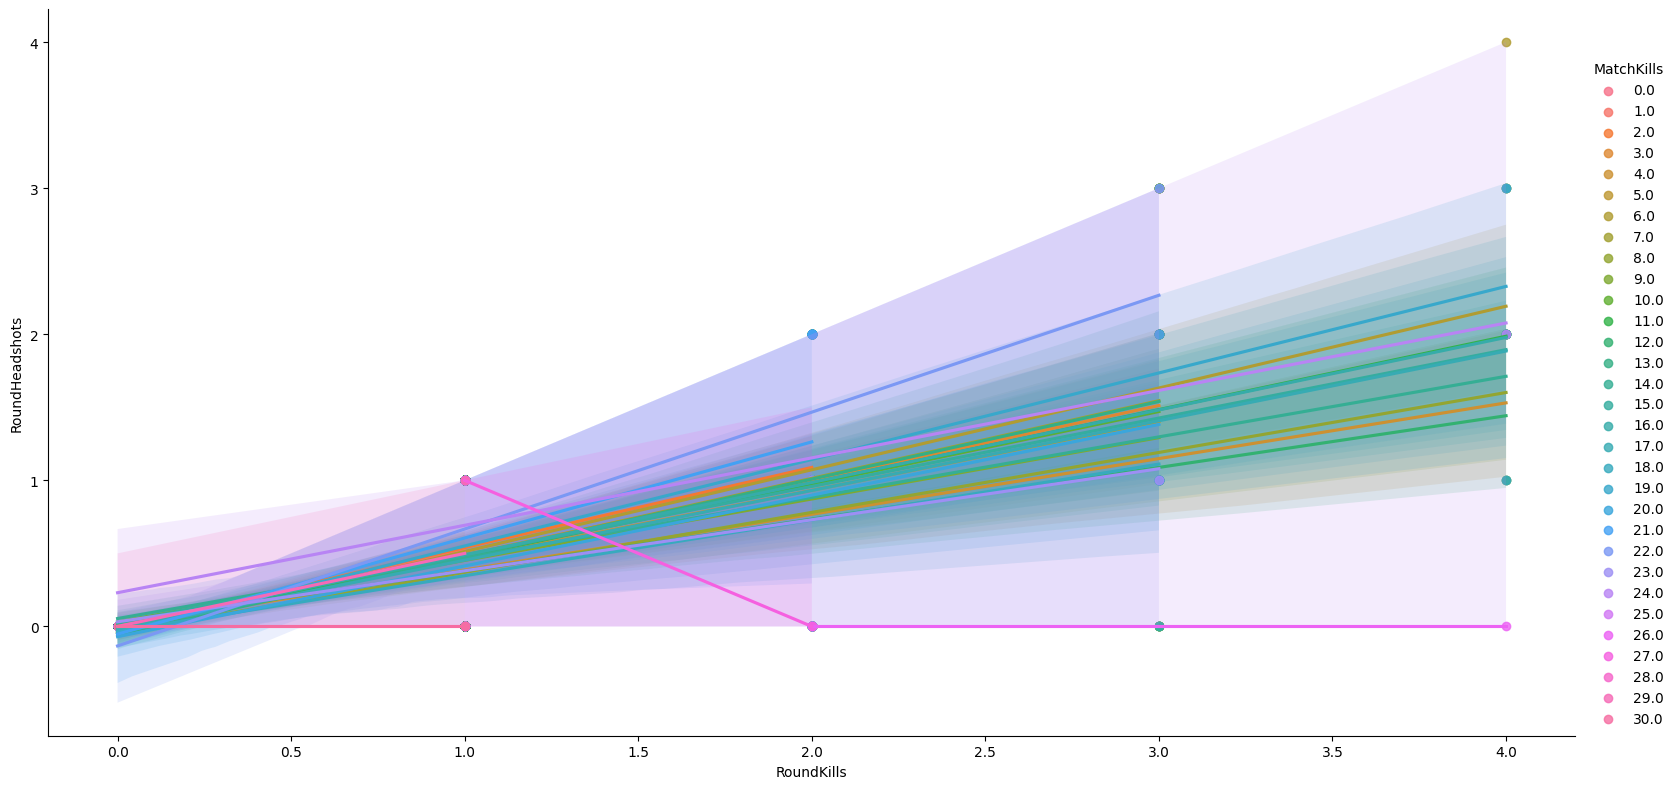

In [ ]:
sns.lmplot(x="RoundKills", y="RoundHeadshots", hue="MatchKills", data=df, height=8, aspect=2)
plt.show()

Este gráfico te permite analizar la relación entre el número de muertes y el número de "headshots" en una ronda de Counter-Strike, considerando también la cantidad total de muertes en el partido en general. Puedes observar si esta relación varía dependiendo de la intensidad de las muertes en el partido.

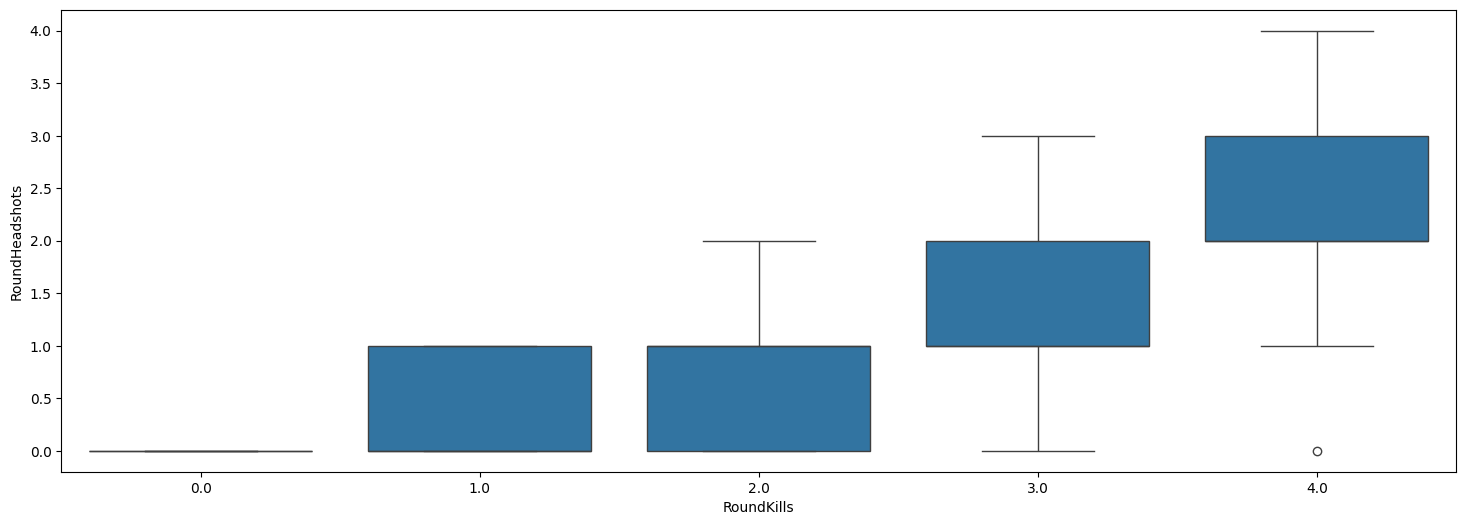

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(x="RoundKills", y="RoundHeadshots", data=df)
plt.show()

Este gráfico te permite comparar la distribución del número de "headshots" en una ronda de Counter-Strike para diferentes valores del número de muertes en esa misma ronda. Puedes identificar patrones de distribución y entender cómo varía el número de "headshots" en función del número de muertes en el juego.

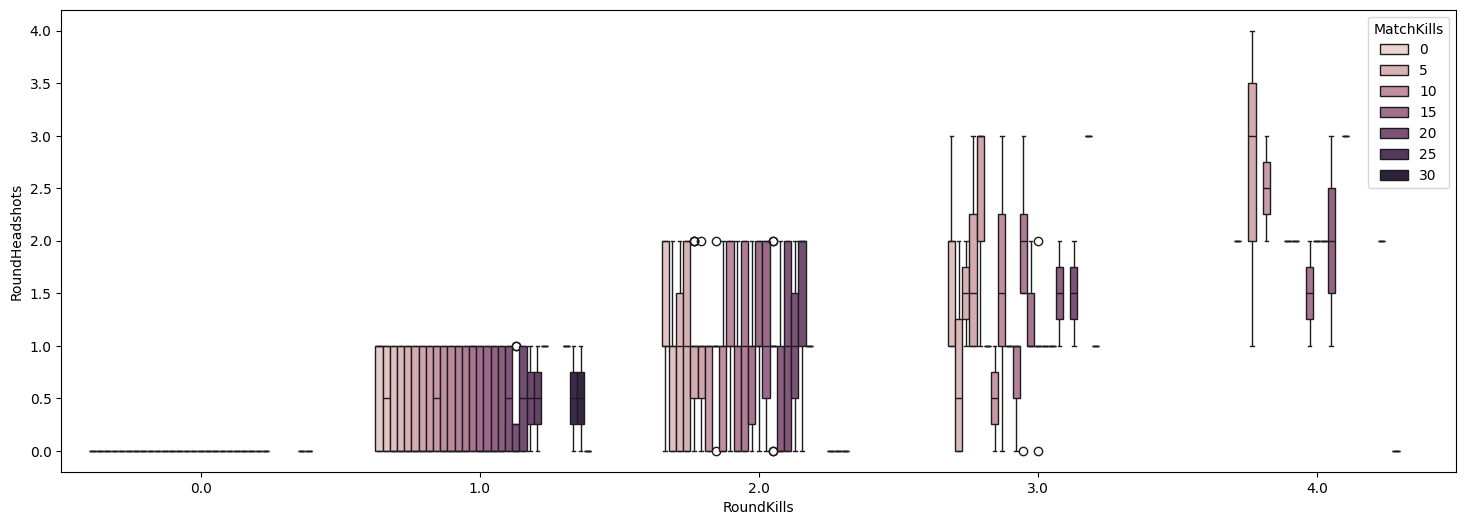

In [ ]:
plt.figure(figsize=(18, 6))
sns.boxplot(x="RoundKills", y="RoundHeadshots", hue="MatchKills", data=df)
plt.show()

Este gráfico te permite comparar la distribución del número de "headshots" en una ronda de Counter-Strike para diferentes valores del número de muertes en esa misma ronda, teniendo en cuenta la cantidad total de muertes en el partido en general. La colorización por MatchKills te permite ver cómo varía esta relación según la intensidad de las muertes en el partido.

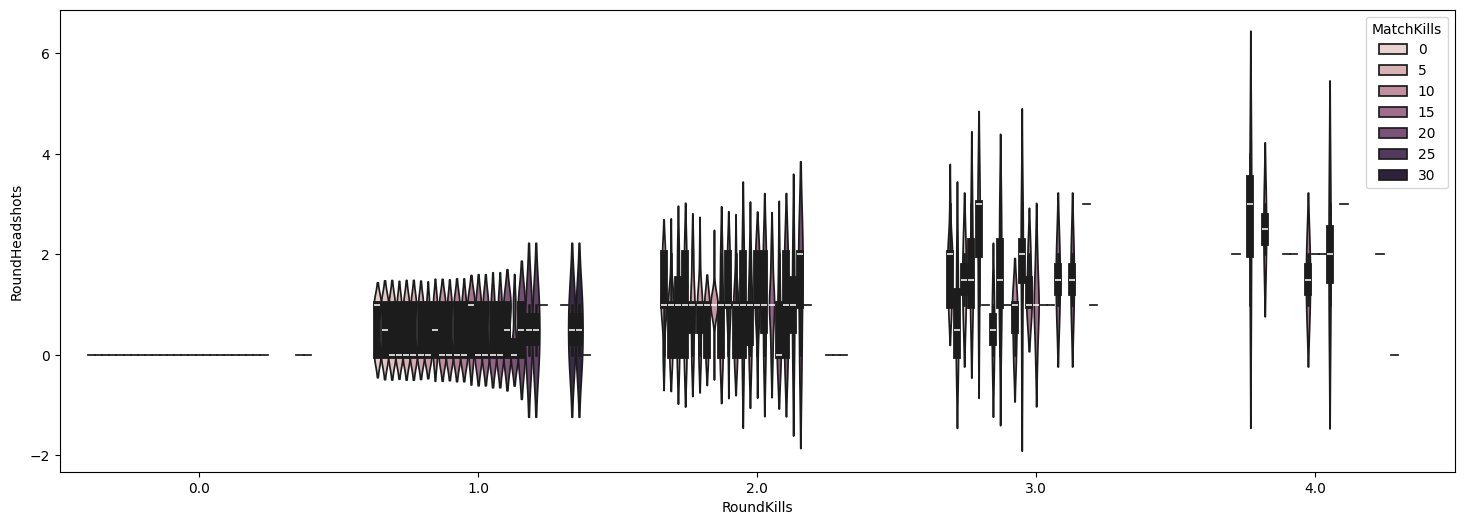

In [ ]:
plt.figure(figsize=(18, 6))
sns.violinplot(x="RoundKills", y="RoundHeadshots", hue="MatchKills", data=df)
plt.show()

Este gráfico de violín te permite visualizar de manera efectiva la distribución conjunta del número de "headshots" y el número de muertes en una ronda de Counter-Strike, considerando también la cantidad total de muertes en el partido en general. La colorización por MatchKills te permite observar cómo se distribuyen los datos y cómo se relacionan estas variables para diferentes niveles de intensidad de muertes en el partido.

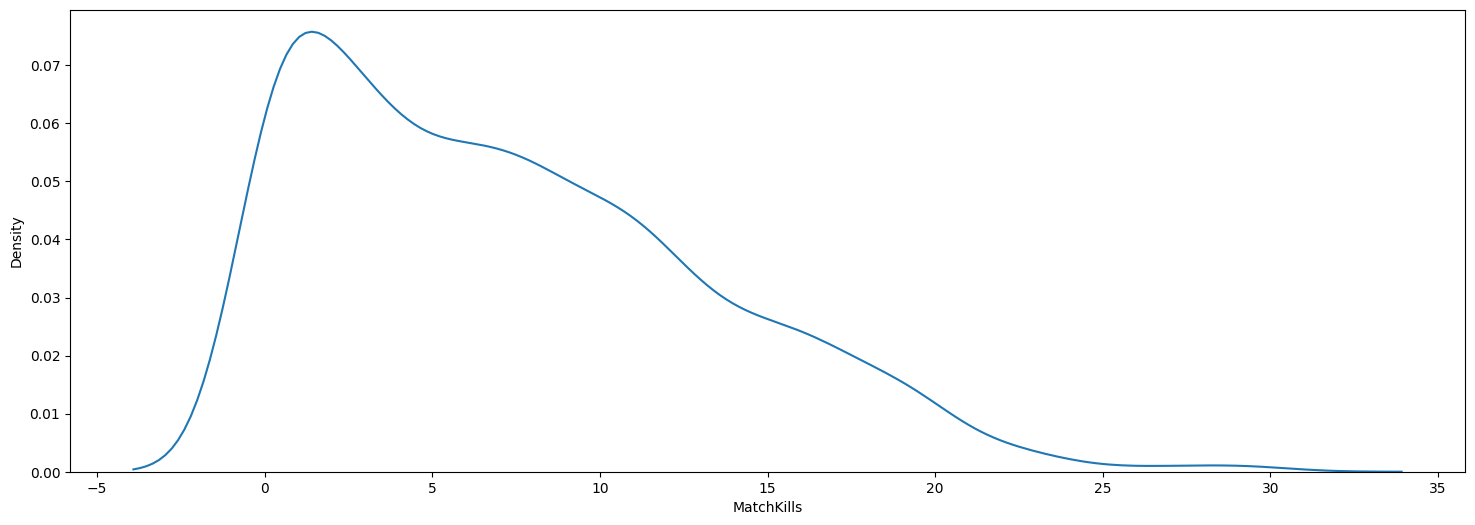

In [ ]:
plt.figure(figsize=(18, 6))
kdeplot(df.MatchKills)
plt.show()

El gráfico KDE (Kernel Density Estimation) de la variable MatchKills te proporciona información sobre la distribución de la cantidad total de muertes en los partidos de Counter-Strike, lo que te permite entender mejor cómo se distribuyen y agrupan estos valores en el conjunto de datos.

# Preparación de Datos

## Binary-Encoding

Esta técnica no es tan intuitiva como las anteriores. Ya que, primero se codifican las categorías como ordinales, luego esos enteros se convierten en código binario, y después los dígitos de esa cadena binaria se dividen en columnas separadas. Así se codifican los datos en menos dimensiones que con un solo punto.

Puedes hacer la codificación binaria de varias maneras, pero la más sencilla es usar la biblioteca category_encoders. Puede instalar category_encoders mediante pip install category_encoders en cmd o simplemente descargar y extraer el archivo .tar.gz del sitio.

Primero tienes que importar la biblioteca category_encoders después de instalarla. Invoca la función BinaryEncoder especificando las columnas que quieres codificar y luego llama al método .fit_transform() con el DataFrame como argumento.

In [18]:
encoder = ce.BinaryEncoder(cols=['Team'])
encoded_data = encoder.fit_transform(df['Team'])
df2 = pd.concat([df, encoded_data], axis=1)

df2_newcolumns = df2.columns.difference(df.columns)
df2_newcolumns = df2[df2_newcolumns]
print(df3_new)

       Map_de_dust2  Map_de_inferno  Map_de_mirage  Map_de_nuke
0             False            True          False        False
1             False            True          False        False
2             False            True          False        False
3             False            True          False        False
4             False            True          False        False
...             ...             ...            ...          ...
79152         False           False          False        False
79153         False           False          False        False
79154         False           False          False        False
79155         False           False          False        False
79156         False           False          False        False

[79157 rows x 4 columns]


## Hot-Encoding

La estrategia básica consiste en convertir cada valor de la categoría en una nueva columna y asignarle un valor de 1 o 0 (Verdadero/Falso). Esto tiene la ventaja de no ponderar un valor indebidamente.

Hay muchas bibliotecas que soportan la codificación de un solo valor, pero la más sencilla es utilizar el método .get_dummies() de pandas.

Esta función se llama así porque crea variables ficticias/indicadoras (1 o 0). Hay principalmente tres argumentos importantes aquí, el primero es el DataFrame sobre el que se quiere codificar, el segundo es el argumento columnas que permite especificar las columnas sobre las que se quiere hacer la codificación, y el tercero, el argumento prefijo que permite especificar el prefijo para las nuevas columnas que se crearán después de la codificación.

In [17]:
he = pd.get_dummies(df['Map'], prefix='Map')
df3 = pd.concat([df, he], axis=1)

df3_newcolumns = df3.columns.difference(df.columns)
df3_new = df3[df3_newcolumns]
print(df3_new)


       Map_de_dust2  Map_de_inferno  Map_de_mirage  Map_de_nuke
0             False            True          False        False
1             False            True          False        False
2             False            True          False        False
3             False            True          False        False
4             False            True          False        False
...             ...             ...            ...          ...
79152         False           False          False        False
79153         False           False          False        False
79154         False           False          False        False
79155         False           False          False        False
79156         False           False          False        False

[79157 rows x 4 columns]


## Label-Encoding

Otro enfoque es codificar los valores categóricos con una técnica llamada "codificación de etiquetas", que permite convertir cada valor de una columna en un número. Las etiquetas numéricas están siempre entre 0 y n_categorías-1.

Puede realizar la codificación de etiquetas mediante los atributos .cat.codes en la columna de su DataFrame.

In [31]:
label_encoder = LabelEncoder()
df4 = df.copy()
df4['Map_encoded'] = label_encoder.fit_transform(df4['Map'])

print(df4)

       Unnamed: 0         Map       Team  InternalTeamId  MatchId  RoundId  \
0           600.0  de_inferno  Terrorist             1.0      4.0      1.0   
1           601.0  de_inferno  Terrorist             1.0      4.0      1.0   
2           602.0  de_inferno  Terrorist             1.0      4.0      1.0   
3           603.0  de_inferno  Terrorist             1.0      4.0      1.0   
4           604.0  de_inferno  Terrorist             1.0      4.0      1.0   
...           ...         ...        ...             ...      ...      ...   
79152         NaN         NaN        NaN             NaN      NaN      NaN   
79153         NaN         NaN        NaN             NaN      NaN      NaN   
79154         NaN         NaN        NaN             NaN      NaN      NaN   
79155         NaN         NaN        NaN             NaN      NaN      NaN   
79156         NaN         NaN        NaN             NaN      NaN      NaN   

      RoundWinner MatchWinner Survived AbnormalMatch  ... Round